# Vuelos de Cabotaje - Argentina

Se pretende realizar un modelo basado en machine learning orientado a los usuarios de vuelos de cabotaje de aerolineas que vuelan en Argentina. Los objetivos que se plantean son los siguientes:

**1. Predicción de Retrasos**: Desarrollar un modelo que prediga la probabilidad de retrasos en los vuelos. Utilizando datos históricos de vuelos, condiciones meteorológicas y otros factores, los usuarios podrían recibir alertas sobre la probabilidad de que su vuelo se retrase, lo que les permitiría planificar mejor su tiempo.

El modelo se desarrollará considerando los datos que se obtengan de distintas fuentes desde el año **2021 hasta la actualidad**



## Extraccion

### Datos de Vuelos

In [110]:
### Aterrizajes y despegues procesados por la Administración Nacional de Aviación Civil (ANAC)

# Vuelos
%%capture
!wget https://datos.transporte.gob.ar/dataset/21038a1a-c3c7-4494-b76a-3a2a8fbb83b5/resource/1b4f569a-cab0-4560-993c-5bf96c3e7cf0/download/202112_informe_ministerio.csv
!wget https://datos.transporte.gob.ar/dataset/21038a1a-c3c7-4494-b76a-3a2a8fbb83b5/resource/11894a35-de36-4579-b084-d1191f551fbe/download/202212-informe-ministerio.csv
!wget https://datos.transporte.gob.ar/dataset/21038a1a-c3c7-4494-b76a-3a2a8fbb83b5/resource/e910fead-ade3-40ce-ae8f-cad2017aa007/download/202312-informe-ministerio-actualizado-dic.csv
!wget https://datos.transporte.gob.ar/dataset/21038a1a-c3c7-4494-b76a-3a2a8fbb83b5/resource/6004191c-83ca-4a0a-a687-c059bb0a8c8e/download/202408-informe-ministerio.csv
!wget https://datos.transporte.gob.ar/dataset/21038a1a-c3c7-4494-b76a-3a2a8fbb83b5/resource/0706775f-bed9-46e7-aac5-726d7e72e429/download/202508-informe-ministerio_actualiz.csv

### Datos de Aeropuertos

In [111]:
# Aeropuertos
%%capture
!wget https://datos.transporte.gob.ar/dataset/62b3fe5f-ffe6-4d8f-9d59-bfabe75d1ee8/resource/eb54e49e-9a5a-4614-91f4-526c650d0105/download/aeropuertos_detalle.csv

## Transformacion

#### Esquema de datos: **Vuelos**


| **Campo**                     | **Tipo de Dato** | **Descripción**                                                                                                                                     |
|-------------------------------|-----------------|-----------------------------------------------------------------------------------------------------------------------------------------------------|
| **Fecha**                     | date            | Fecha de vuelo UTC                                                                                                                                  |
| **Hora UTC**                  | string          | Hora UTC (Tiempo Universal Coordinado). Al evaluar el dato, considerar que Argentina tiene hora oficial UTC -3.                                      |
| **Clase de Vuelo**            | string          | Categorías de vuelos                                                                                                                                |
| **Clasificación Vuelo**        | string          | Clasificación del tipo de vuelo: Cabotaje o Internacional                                                                                           |
| **Tipo de Movimiento**        | string          | Clasificación del tipo de movimiento. Se considera “Movimiento” a una operación, sea aterrizaje o despegue.                                          |
| **Aeropuerto**                | string          | Nombre del aeropuerto (código FAA)                                                                                                                  |
| **Origen / Destino**          | string          | Código FAA para aeropuertos nacionales y OACI para aeropuertos extranjeros                                                                           |
| **Aerolínea Nombre**          | string          | Nombre de la línea aérea                                                                                                                            |
| **Aeronave**                  | string          | Código para identificar a los fabricantes de las aeronaves con la designación específica del modelo del avión.                                        |
| **Pasajeros**                 | integer         | Cantidad de pasajeros por operación individual (despegue/aterrizaje). Para vuelos de cabotaje se registra despegue y aterrizaje.                      |
| **PAX**                       | string   | 1 pax = 1 tarjeta de embarque. Usar esta columna al analizar la cantidad de pasajeros de cabotaje a nivel total país.                                 |
| **Calidad dato**              | no utilizado    | La información de los últimos 3 meses es provisoria.                                                                                                |





#### Esquema de datos: **Aeropuertos**

| **Campo**        | **Tipo de Dato** | **Descripción**                                                                                                   |
|------------------|------------------|-------------------------------------------------------------------------------------------------------------------|
| **Local**        | string           | Localidad donde se encuentra el aeropuerto.                                                                       |
| **OACI**         | string           | Abreviación del aeropuerto (código OACI).                                                                         |
| **IATA**         | string           | Código de tres letras asignado por la Asociación Internacional de Transporte Aéreo (IATA).                        |
| **Tipo**         | string           | Se refiere al tipo de infraestructura (aeródromo o helipuerto).                                                   |
| **Denominación** | string           | Nombre oficial del aeródromo o helipuerto.                                                                        |
| **Coordenadas**  | string           | Coordenadas geográficas en formato estándar.                                                                      |
| **Latitud**      | string           | Especifica la ubicación exacta en grados de latitud.                                                              |
| **Longitud**     | string           | Especifica la ubicación exacta en grados de longitud.                                                             |
| **Elev**         | float            | Elevación del aeródromo sobre el nivel del mar.                                                                   |
| **UOM Elev**     | string           | Unidad de medida utilizada para expresar la elevación (metros o pies).                                            |
| **Ref**          | string           | Referencia de ubicación.                                                                                          |
| **Distancia Ref**| float            | Distancia desde la referencia especificada.                                                                       |
| **Dirección Ref**| string           | Dirección en grados desde el punto de referencia.                                                                 |
| **Condición**    | string           | Condición operativa del aeródromo (público o privado).                                                            |
| **Control**      | string           | Indica si el aeródromo tiene control de tráfico aéreo.                                                            |
| **Región**       | string           | Región administrativa donde está ubicado el aeródromo.                                                            |
| **FIR**          | string           | Región de Información de Vuelo (Flight Information Region).                                                       |
| **Uso**          | string           | Uso del aeródromo (militar, civil o mixto).                                                                       |
| **Tráfico**      | string           | Tipo de tráfico permitido (internacional o nacional).                                                             |
| **SNA**          | string           | Indica si pertenece al Sistema Nacional de Aeropuertos (SNA).                                                     |
| **Concesionado** | string           | Indica si el aeródromo está concesionado a una entidad privada.                                                   |
| **Provincia**    | string           | Provincia en la que se encuentra el aeródromo.                                                                    |
| **Inhab**        | no utilizado     | Indica si el aeródromo está inhabilitado para operaciones.                                                        |


In [112]:
# Importamos librerias
import pandas as pd
import numpy as np
from datetime import datetime
from datetime import timedelta

In [113]:
# Configurar pandas para mostrar todas las columnas
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

#### Limpieza, Validacion y Correccion: Vuelos

In [114]:
# Cargar a dataframe archivos CSV

df_2021 = pd.read_csv("/content/202112_informe_ministerio.csv", sep=';')
df_2022 = pd.read_csv("/content/202212-informe-ministerio.csv", sep=';' )
df_2023 = pd.read_csv("/content/202312-informe-ministerio-actualizado-dic.csv", sep=';')
df_2024 = pd.read_csv("/content/202408-informe-ministerio.csv", sep=';')
df_2025 = pd.read_csv("/content/202508-informe-ministerio_actualiz.csv", sep=';')

/tmp/ipython-input-2149329988.py:4: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2022 = pd.read_csv("/content/202212-informe-ministerio.csv", sep=';' )


***Se corrige el warning al importar, ya que se detecta tipo de datos mixtos. Se corrige en la celda siguiente***

In [115]:
# Corregir tipo de datos en columna (8) de df_2020 y columna (10) de df_2022
df_2022['PAX'] = df_2022['PAX'].astype(str)

In [116]:
# Contar la cantidad de columnas de cada dataframe
print("Cantidad de columnas en df_2021:", len(df_2021.columns))
print("Cantidad de columnas en df_2022:", len(df_2022.columns))
print("Cantidad de columnas en df_2023:", len(df_2023.columns))
print("Cantidad de columnas en df_2024:", len(df_2024.columns))
print("Cantidad de columnas en df_2025:", len(df_2025.columns))

Cantidad de columnas en df_2021: 1
Cantidad de columnas en df_2022: 12
Cantidad de columnas en df_2023: 12
Cantidad de columnas en df_2024: 12
Cantidad de columnas en df_2025: 12


***Nota: Se detecta un error de importación, ya que uno de los archivos CSV tiene un delimitador distinto al resto de los archivos y eso provoca la importacion a una sola columna del df_2021. Se corrige en la celda siguiente***

In [117]:
df_2021 = pd.read_csv("/content/202112_informe_ministerio.csv", sep=',')
print("Cantidad de columnas en df_2021:", len(df_2021.columns))

Cantidad de columnas en df_2021: 12


In [118]:
# Combinar todos los df de vuelos en uno solo
df_vuelos = pd.concat([df_2021, df_2022, df_2023, df_2024,df_2025])


In [119]:
df_vuelos.columns, df_vuelos.shape

(Index(['Fecha', 'Hora UTC', 'Clase de Vuelo (todos los vuelos)',
        'Clasificación Vuelo', 'Tipo de Movimiento', 'Aeropuerto',
        'Origen / Destino', 'Aerolinea Nombre', 'Aeronave', 'Pasajeros', 'PAX',
        'Calidad dato', 'Fecha UTC'],
       dtype='object'),
 (2333982, 13))

***Se detecta que las columnas de cada df son diferentes en su etiqueta. Deberían ser 12 y se encuentran 17.Se corrige en la celda siguiente***

In [120]:
columnas = ['Fecha', 'Hora UTC', 'Clase de Vuelo', 'Clasificacion Vuelo', 'Tipo Movimiento', 'Aeropuerto',
        'Origen / Destino', 'Aerolinea Nombre', 'Aeronave', 'Pasajeros', 'PAX', 'Calidad del dato']

df_2021.columns = columnas
df_2022.columns = columnas
df_2023.columns = columnas
df_2024.columns = columnas
df_2025.columns = columnas


df_vuelos = pd.concat([df_2021, df_2022, df_2023, df_2024,df_2025])


In [121]:
# Verificar
df_vuelos.columns, df_vuelos.shape

(Index(['Fecha', 'Hora UTC', 'Clase de Vuelo', 'Clasificacion Vuelo',
        'Tipo Movimiento', 'Aeropuerto', 'Origen / Destino', 'Aerolinea Nombre',
        'Aeronave', 'Pasajeros', 'PAX', 'Calidad del dato'],
       dtype='object'),
 (2333982, 12))

In [122]:
# Primera vista
df_vuelos.head(10)

,Fecha,Hora UTC,Clase de Vuelo,Clasificacion Vuelo,Tipo Movimiento,Aeropuerto,Origen / Destino,Aerolinea Nombre,Aeronave,Pasajeros,PAX,Calidad del dato
0,01/01/2021,00:02,Vuelo Privado con Matrícula Nacional,Doméstico,Despegue,PAR,ROS,0,PA-PA-28-181,0,0,DEFINITIVO
1,01/01/2021,00:24,Regular,Doméstico,Aterrizaje,EZE,GRA,AEROLINEAS ARGENTINAS SA,BO-B737-8MB,140,70,DEFINITIVO
2,01/01/2021,00:26,Regular,Doméstico,Aterrizaje,EZE,ECA,AEROLINEAS ARGENTINAS SA,BO-737-800,140,70,DEFINITIVO
3,01/01/2021,00:29,Regular,Doméstico,Aterrizaje,EZE,SAL,AEROLINEAS ARGENTINAS SA,BO-B-737-76N,24,12,DEFINITIVO
4,01/01/2021,00:37,Regular,Doméstico,Aterrizaje,EZE,TUC,AEROLINEAS ARGENTINAS SA,EMB-ERJ190100IGW,52,26,DEFINITIVO
5,01/01/2021,00:59,Regular,Internacional,Aterrizaje,EZE,SBGR,TURK HAVA YOLLARI (TURKISH AIRLINES CO.),0,62,62,DEFINITIVO
6,01/01/2021,01:00,Vuelo Privado con Matrícula Nacional,Doméstico,Aterrizaje,ROS,PAR,0,PA-PA-28-181,0,0,DEFINITIVO
7,01/01/2021,01:12,Regular,Internacional,Despegue,EZE,MMMX,AEROVIAS DE MEXICO - AEROMEXICO,0,198,198,DEFINITIVO
8,01/01/2021,01:52,Regular,Internacional,Despegue,EZE,KDFW,AMERICAN AIRLINES INC.,0,193,193,DEFINITIVO
9,01/01/2021,02:08,Regular,Internacional,Despegue,EZE,KMIA,AMERICAN AIRLINES INC.,0,255,255,DEFINITIVO


In [123]:
# Verificacion de dualidad de registros por vuelo
df_vuelos[['Fecha','Hora UTC','Tipo Movimiento','Aeropuerto','Origen / Destino','Pasajeros','Aerolinea Nombre']][(df_vuelos['Fecha'] == '13/01/2021') & (df_vuelos['Pasajeros'] == 190) & (((df_vuelos['Aeropuerto'] == 'EZE') | (df_vuelos['Aeropuerto'] == 'BAR')) & ((df_vuelos['Origen / Destino'] == 'EZE') | (df_vuelos['Origen / Destino'] == 'BAR')))]

,Fecha,Hora UTC,Tipo Movimiento,Aeropuerto,Origen / Destino,Pasajeros,Aerolinea Nombre
8478,13/01/2021,09:20,Despegue,EZE,BAR,190,FB LÍNEAS AÉREAS - FLYBONDI
8525,13/01/2021,11:13,Aterrizaje,BAR,EZE,190,FB LÍNEAS AÉREAS - FLYBONDI


***Se verifica que existe por cada vuelo dos registros correspondientes al mismo vuelo, uno de Despegue y el otro de Aterrizaje***

In [124]:
# Validacion de datos null
df_vuelos.isnull().sum()

,0
Fecha,0
Hora UTC,0
Clase de Vuelo,0
Clasificacion Vuelo,0
Tipo Movimiento,0
Aeropuerto,0
Origen / Destino,0
Aerolinea Nombre,0
Aeronave,0
Pasajeros,0


In [125]:
# categorias para clase de vuelo
df_vuelos['Clase de Vuelo'].value_counts()

,count
Clase de Vuelo,
Regular,1284731
Vuelo Privado con Matrícula Nacional,357070
Vuelo Escuela,320427
No Regular,194211
Vuelo Oficial Nacional,135422
Vuelo Privado con Matrícula Extranjera,18963
Vuelo de Adiestramiento,14784
Trabajo Aéreo,6543
Vuelo Oficial Extranjero,1831


***Solo se tomará en cuenta los registros categorizados como regulares ('Regular'), el resto serán eliminados***

In [126]:
#eliminar aquellos registros que que en 'Clase de vuelo' sean distintos a 'Regular'

df_vuelos = df_vuelos[df_vuelos['Clase de Vuelo'].isin(['Regular'])]
df_vuelos.shape

(1284731, 12)

In [127]:
# verificar cuantas categorias tiene la columna clase de vuelo
df_vuelos['Clase de Vuelo'].value_counts()

,count
Clase de Vuelo,
Regular,1284731


***se elimina la columna "Clase de Vuelo", no aporta valor***

In [128]:
# eliminar la columna clase de vuelo
df_vuelos = df_vuelos.drop(columns=['Clase de Vuelo'])

***Se eliminarán los registros que no sean:***

*   AEROLINEAS ARGENTINAS SA
*   FB LÍNEAS AÉREAS FLYBONDI
*   JETSMART AIRLINES S.A.

In [129]:
#Se obtienen la cantidad de registros unicos de aerolineas

aerolineas = df_vuelos['Aerolinea Nombre'].unique()
numero_aerolineas = len(aerolineas)
print(f"cantidad de aerolineas: {numero_aerolineas}")

cantidad de aerolineas: 301


In [130]:
#aerolineas que mas aparecen
df_vuelos['Aerolinea Nombre'].value_counts().head(10)

,count
Aerolinea Nombre,
AEROLINEAS ARGENTINAS SA,790345
FB LÍNEAS AÉREAS - FLYBONDI,154226
JETSMART AIRLINES S.A.,134127
GOL LINHAS AÉREAS S.A.,22672
LATAM AIRLINES GROUP S.A.(exLAN AIRLINE),18049
COMPAÑIA PANAMEÑA DE AVIACION,16712
LATAM AIRLINES BRASIL (exTAM LA SA),13152
LAN PERU,12690
SKY AIRLINE S.A.,12516


In [131]:
#cantidad de registros con estas aerolineas
cantidad_aerolineas_no_seleccionadas = df_vuelos[~df_vuelos['Aerolinea Nombre'].isin(['AEROLINEAS ARGENTINAS SA', 'FB LÍNEAS AÉREAS - FLYBONDI', 'JETSMART AIRLINES S.A.'])]['Aerolinea Nombre'].count()
cantidad_aerolineas_no_seleccionadas, df_vuelos.shape

(np.int64(206033), (1284731, 11))

In [132]:
#Se dropean los registros con aerolineas no seleccionadas
df_vuelos = df_vuelos[df_vuelos['Aerolinea Nombre'].isin(['AEROLINEAS ARGENTINAS SA', 'FB LÍNEAS AÉREAS - FLYBONDI', 'JETSMART AIRLINES S.A.'])]
df_vuelos.shape

(1078698, 11)

***Eliminar los vuelos Internacionales ya que se usarán solo los Nacionales para el análisis***

In [133]:
# Eliminacion de los vuelos internacionales
# Primero, limpiamos los valores de la columna 'Clasificacion Vuelo' para eliminar espacios extra
df_vuelos['Clasificacion Vuelo'] = df_vuelos['Clasificacion Vuelo'].str.strip()

# Ahora aplicamos el filtro para eliminar los vuelos internacionales
df_vuelos = df_vuelos[df_vuelos['Clasificacion Vuelo'] != 'Internacional']


### Verificación de `value_counts()` después de eliminar vuelos internacionales

In [134]:
# Verificamos la distribución de las clasificaciones de vuelo después del filtro
df_vuelos['Clasificacion Vuelo'].value_counts()

,count
Clasificacion Vuelo,
Doméstico,985611


***Eliminar la columna "Calidad del dato" ya que no se utilizará para el análisis***

In [135]:
# Eliminar la columna Calidad del dato
df_vuelos = df_vuelos.drop(columns=['Calidad del dato'])


In [136]:
# Eliminar los vuelos con registro de pasajeros en 0
df_vuelos = df_vuelos[df_vuelos['Pasajeros'] != 0]
df_vuelos.shape

(975607, 10)

### **Procesamiento de Fechas y Horas**

In [137]:
# Convertir columna de fechas a tipo date
df_vuelos['Fecha'] = pd.to_datetime(df_vuelos['Fecha'], format='%d/%m/%Y')

In [138]:
# Verificar los distintos largos de string de la columna Hora UTC
df_vuelos['Hora UTC'].apply(lambda x: len(x)).value_counts()

,count
Hora UTC,
5,841158
4,134449


In [139]:
# Completar los valores de la columna Hora UTC con '0' cuando el largo del string sea 4 (ej: 0:37 debe ser 00:37)
df_vuelos['Hora UTC'] = df_vuelos['Hora UTC'].apply(lambda x: '0' + x if len(x) == 4 else x)

In [140]:
# Completar los valores de la columna Hora UTC con ':00' cuando el largo del string sea 5 (ej: 00:37 debe ser 00:37:00)
df_vuelos['Hora UTC'] = df_vuelos['Hora UTC'].apply(lambda x: x + ':00' if len(x) == 5 else x)

In [141]:
# Verificar nuevamente los distintos largos de string de la columna Hora UTC
df_vuelos['Hora UTC'].apply(lambda x: len(x)).value_counts()

,count
Hora UTC,
8,975607


**Incorporamos correccion de la hora UTC a hora local**

In [142]:
# Convertir columna de hora a tipo datetime
df_vuelos['Hora UTC'] = df_vuelos['Hora UTC'].apply(lambda x: datetime.strptime(x, '%H:%M:%S').time())

In [143]:
# Incorporar un atributo de la fecha y la hora unificado y ajustado a la hora local argentina
df_vuelos['Fecha_Hora_Local'] = pd.to_datetime(df_vuelos['Fecha'].astype(str) + ' ' + df_vuelos['Hora UTC'].astype(str)) - timedelta(hours=3)
df_vuelos.head()


,Fecha,Hora UTC,Clasificacion Vuelo,Tipo Movimiento,Aeropuerto,Origen / Destino,Aerolinea Nombre,Aeronave,Pasajeros,PAX,Fecha_Hora_Local
1,2021-01-01,00:24:00,Doméstico,Aterrizaje,EZE,GRA,AEROLINEAS ARGENTINAS SA,BO-B737-8MB,140,70,2020-12-31 21:24:00
2,2021-01-01,00:26:00,Doméstico,Aterrizaje,EZE,ECA,AEROLINEAS ARGENTINAS SA,BO-737-800,140,70,2020-12-31 21:26:00
3,2021-01-01,00:29:00,Doméstico,Aterrizaje,EZE,SAL,AEROLINEAS ARGENTINAS SA,BO-B-737-76N,24,12,2020-12-31 21:29:00
4,2021-01-01,00:37:00,Doméstico,Aterrizaje,EZE,TUC,AEROLINEAS ARGENTINAS SA,EMB-ERJ190100IGW,52,26,2020-12-31 21:37:00
15,2021-01-01,07:09:00,Doméstico,Despegue,EZE,ECA,AEROLINEAS ARGENTINAS SA,BO-B737-800,70,35,2021-01-01 04:09:00


In [144]:
# Eliminamos la columna Hora UTC
df_vuelos = df_vuelos.drop(columns=['Hora UTC'])

**se elimina la columna "Clasificacion Vuelo", no aporta valor**

In [145]:
# eliminar la columna clasificacion vuelo
df_vuelos = df_vuelos.drop(columns=['Clasificacion Vuelo'])

In [146]:
# Crear una columna nueva para convertir desde la columna 'Fecha' a Año
df_vuelos['Año'] = df_vuelos['Fecha'].dt.year

In [147]:
df_vuelos.head(5)

,Fecha,Tipo Movimiento,Aeropuerto,Origen / Destino,Aerolinea Nombre,Aeronave,Pasajeros,PAX,Fecha_Hora_Local,Año
1,2021-01-01,Aterrizaje,EZE,GRA,AEROLINEAS ARGENTINAS SA,BO-B737-8MB,140,70,2020-12-31 21:24:00,2021
2,2021-01-01,Aterrizaje,EZE,ECA,AEROLINEAS ARGENTINAS SA,BO-737-800,140,70,2020-12-31 21:26:00,2021
3,2021-01-01,Aterrizaje,EZE,SAL,AEROLINEAS ARGENTINAS SA,BO-B-737-76N,24,12,2020-12-31 21:29:00,2021
4,2021-01-01,Aterrizaje,EZE,TUC,AEROLINEAS ARGENTINAS SA,EMB-ERJ190100IGW,52,26,2020-12-31 21:37:00,2021
15,2021-01-01,Despegue,EZE,ECA,AEROLINEAS ARGENTINAS SA,BO-B737-800,70,35,2021-01-01 04:09:00,2021


### Graficos preliminares para mejor interpretación de los datos

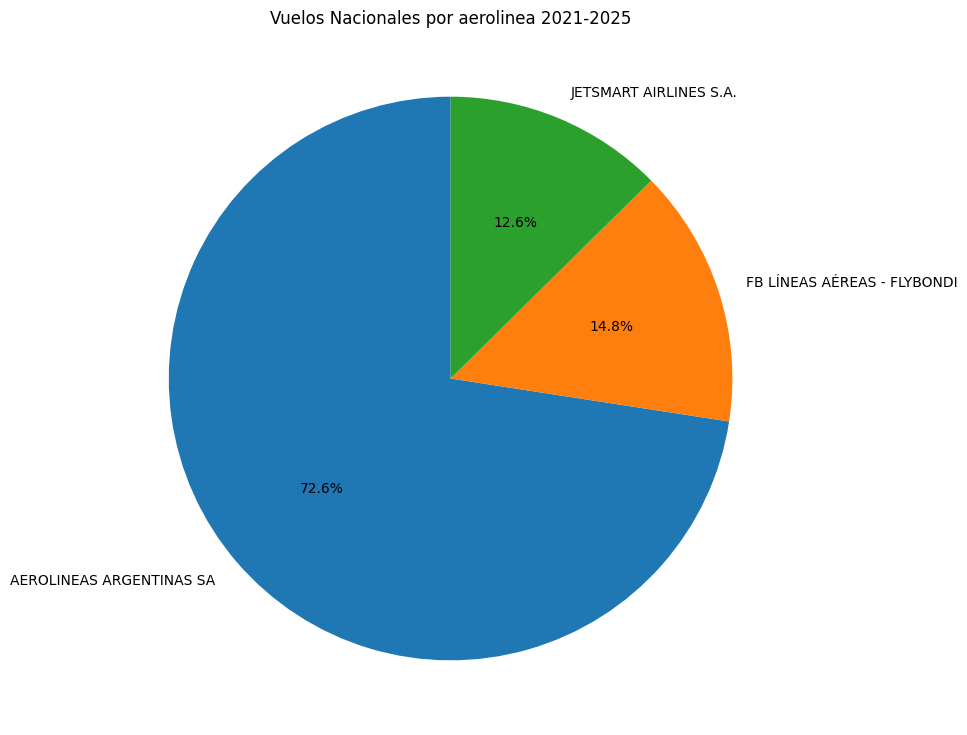

In [148]:
# grafico de torta con las diferentes nombre de aerolineas, las aerolineas con menos de 3.5% de participacion se unificaran como categoria "otras"

import matplotlib.pyplot as plt

# Agrupar por aerolínea y contar la cantidad de vuelos
aerolineas_counts = df_vuelos.groupby('Aerolinea Nombre')['Aerolinea Nombre'].count()

# Calcular el porcentaje de participación de cada aerolínea
aerolineas_porcentaje = (aerolineas_counts / aerolineas_counts.sum()) * 100

# Crear el gráfico de torta
plt.figure(figsize=(8, 9))
plt.pie(aerolineas_porcentaje, labels=aerolineas_porcentaje.index, autopct='%1.1f%%', startangle=90)
plt.title('Vuelos Nacionales por aerolinea 2021-2025')
plt.axis('equal')  # Asegurar que el gráfico sea un círculo
plt.show()

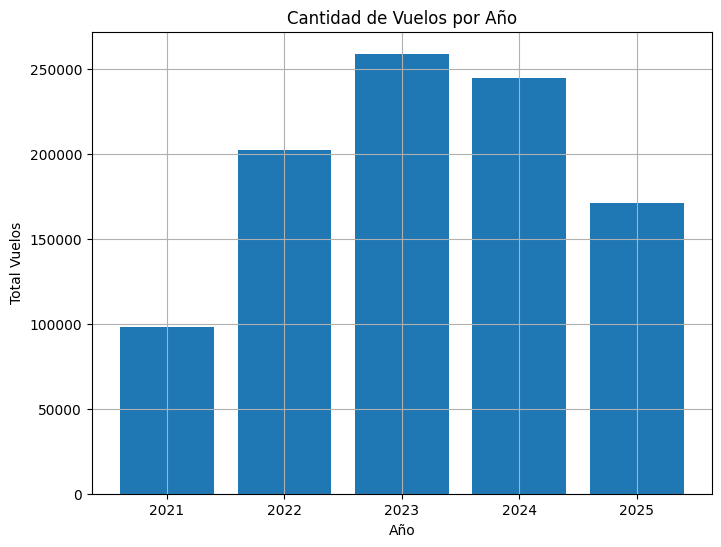

In [149]:
import matplotlib.pyplot as plt

# Agrupar y calcular cantidad de vuelos por año
vuelos_por_año = df_vuelos.groupby('Año')['Año'].count().reset_index(name='Total Vuelos')

# Crear histograma
plt.figure(figsize=(8, 6))
plt.bar(vuelos_por_año['Año'], vuelos_por_año['Total Vuelos'])  # Use bar plot for discrete data
plt.xlabel('Año')
plt.ylabel('Total Vuelos')
plt.title('Cantidad de Vuelos por Año')
plt.xticks(vuelos_por_año['Año'])  # x para los años
plt.grid(True)
plt.show()

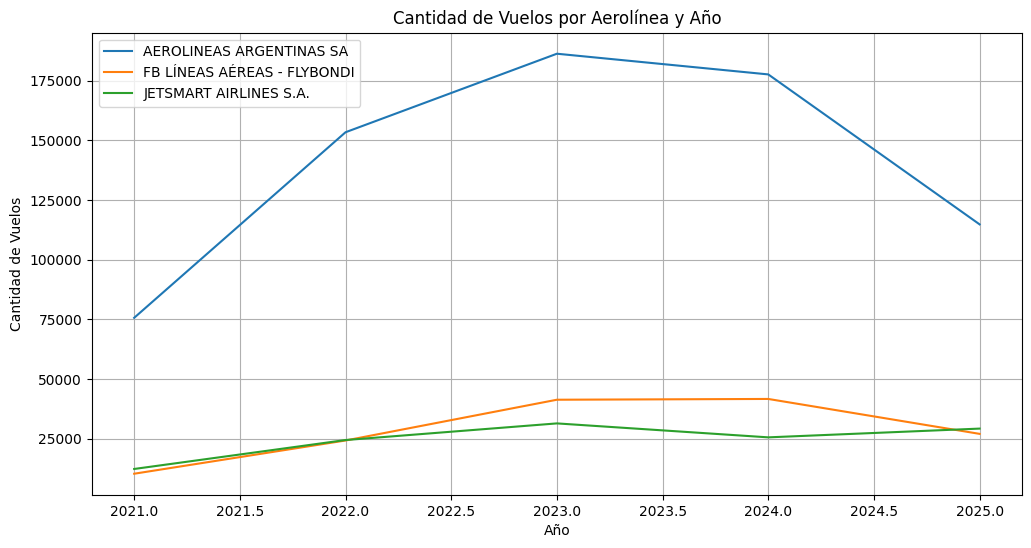

In [150]:
# Se obtienen los vuelos por aerolínea y año
vuelos_por_aerolinea_y_año = df_vuelos.groupby(['Aerolinea Nombre', 'Año']).size().reset_index(name='Total Vuelos')
# Crear el gráfico de líneas de cada aerolinea y la cantidad de vuelos que tuvo en cada año

plt.figure(figsize=(12, 6))
for aerolinea in vuelos_por_aerolinea_y_año['Aerolinea Nombre'].unique():
  df_aerolinea = vuelos_por_aerolinea_y_año[vuelos_por_aerolinea_y_año['Aerolinea Nombre'] == aerolinea]
  plt.plot(df_aerolinea['Año'], df_aerolinea['Total Vuelos'], label=aerolinea)

plt.xlabel('Año')
plt.ylabel('Cantidad de Vuelos')
plt.title('Cantidad de Vuelos por Aerolínea y Año')
plt.legend()
plt.grid(True)
plt.show()

##### Criterio de corte del rango de datos

**Para este proyecto se van a considerar los datos desde el 2021 en adelante de acuerdo a los siguientes argumentos**

- Se establece que los últimos 4 años es un período representativo para determinar el análisis histórico y el comportamiento a futuro.
- En año 2019 han volado aerolineas que a partir del año pandémico han dejado de volar.
- El 2020 fue un año pandemico por ende atípico
- A partir del 2021 el mercado de vuelos de cabotaje se ha distribuido en 3 líneas aereas, A.Argentinas, JetSmart y FlyBondi. Esto permite un estudio equilibrado desde 2021 al presente.
- Como el año actual (2025) aún no ha terminado, se observa una caída en los vuelos con respecto a otros años. Una de las razones por lo cual esto sucede es debido a que para fin de año mucha gente suele tomar más vuelos por las festividades y vacaciones.

In [151]:
df_vuelos = df_vuelos[ pd.to_datetime(df_vuelos['Fecha_Hora_Local']) >= pd.to_datetime('2021-01-01')].sort_values(by='Fecha_Hora_Local')
print(df_vuelos.shape)
df_vuelos.head()

(975603, 10)


,Fecha,Tipo Movimiento,Aeropuerto,Origen / Destino,Aerolinea Nombre,Aeronave,Pasajeros,PAX,Fecha_Hora_Local,Año
15,2021-01-01,Despegue,EZE,ECA,AEROLINEAS ARGENTINAS SA,BO-B737-800,70,35,2021-01-01 04:09:00,2021
16,2021-01-01,Despegue,EZE,JUJ,AEROLINEAS ARGENTINAS SA,EMB-ERJ190100IGW,92,46,2021-01-01 05:10:00,2021
17,2021-01-01,Despegue,EZE,BAR,AEROLINEAS ARGENTINAS SA,BO-737-800,162,81,2021-01-01 05:14:00,2021
19,2021-01-01,Despegue,EZE,USU,AEROLINEAS ARGENTINAS SA,BO-B737-8MB,148,74,2021-01-01 05:35:00,2021
22,2021-01-01,Despegue,EZE,NEU,AEROLINEAS ARGENTINAS SA,BO-B737-800,134,67,2021-01-01 06:04:00,2021


#### Limpieza, Validacion y Correccion: Aeropuertos

In [152]:
df_aeropuertos = pd.read_csv("/content/aeropuertos_detalle.csv", sep=';')

In [153]:
df_aeropuertos.head()

,local,oaci,iata,tipo,denominacion,coordenadas,latitud,longitud,elev,uom_elev,ref,distancia_ref,direccion_ref,condicion,control,region,fir,uso,trafico,sna,concesionado,provincia,inhab
0,ACB,NaN,NaN,Aeródromo,CORONEL BOGADO/AGROSERVICIOS,"33°16'20""S 60°34'14""W",-60.57066,-33.27226,44.0,Metros,Coronel Bogado,6.0,NE,PRIVADO,NOCONTROL,RACE,SAEF,AEROAPP,Nacional,NO,NO,SANTA FÉ,NO
1,ACH,NaN,NaN,Aeródromo,GENERAL ACHA,"37°24' 6""S 64°36'49""W",-64.61351,-37.40164,277.0,Metros,General Acha,3.0,SO,PUBLICO,NOCONTROL,RACE,SAEF,CIVIL,Nacional,NO,NO,LA PAMPA,NO
2,ACM,NaN,NaN,Aeródromo,ARRECIFES/LA CURA MALAL,"34° 4'33""S 60° 8'30""W",-60.14170,-34.07574,37.0,Metros,Arrecifes,4.0,OSO,PRIVADO,NOCONTROL,RACE,SAEF,CIVIL,Nacional,NO,NO,BUENOS AIRES,NO
3,ADO,SAWD,PUD,Aeródromo,PUERTO DESEADO,"47°44' 6""S 65°54'15""W",-65.90410,-47.73511,82.0,Metros,Puerto Deseado,2.0,N,PUBLICO,AERADIO,RASU,SAVF,CIVIL,Nacional,NO,NO,SANTA CRUZ,NO
4,ADT,NaN,NaN,Aeródromo,BANDERA/AGROSERVICIOS DOÑA TERESA,"28°51'19""S 62°15'53""W",-62.26462,-28.85541,75.0,Metros,Bandera,4.0,N,PRIVADO,NOCONTROL,RANO,SACF,AEROAPP,Nacional,NO,NO,SANTIAGO DEL ESTERO,NO


In [154]:
# Validat categorias de la columna 'tipo'
df_aeropuertos['tipo'].value_counts()

,count
tipo,
Aeródromo,566
Helipuerto,127


***Los registros de Helipuerto no son de nuestro interes. Se eliminan en la celda siguiente***

In [155]:
# eliminar registros de tipo 'Helipuerto'
df_aeropuertos = df_aeropuertos[df_aeropuertos['tipo'] != 'Helipuerto']

In [156]:
# Validacion de datos null
df_aeropuertos.isnull().sum()

,0
local,0
oaci,442
iata,476
tipo,0
denominacion,0
coordenadas,0
latitud,0
longitud,0
elev,0
uom_elev,0


***Eliminar la columna "inhab" y "fir" ya que no se utilizará para el análisis***

In [157]:
# Eliminar la columna "inhab" y "fir"
df_aeropuertos = df_aeropuertos.drop(columns=['inhab', 'fir'])

In [158]:
# convertir en valor cero los valores nulos de la columna distancia_ref
df_aeropuertos['distancia_ref'] = df_aeropuertos['distancia_ref'].fillna(0)

***la relacion de codigo del aeropuerto entre df_vuelos y df_aeropuertos es la columna "local", por lo que no tiene mayor importancia los valores nulos de oaci y iata***

In [159]:
# ver los registros en los que la columna IATA y OACI son nulos
num_null_records = df_aeropuertos[df_aeropuertos['iata'].isnull() & df_aeropuertos['oaci'].isnull()].shape[0]

# Print the result
print(f"Number of records with null values in 'iata' and 'oaci' columns: {num_null_records}")

Number of records with null values in 'iata' and 'oaci' columns: 441


In [160]:
#Se dropean las columnas ya que en su mayoría son nulos
df_aeropuertos = df_aeropuertos.drop(columns=['iata', 'oaci'])

In [161]:
# Transformar a dato decimal las columnas latitud y longitud
df_aeropuertos['latitud'] = df_aeropuertos['latitud'].astype(float)
df_aeropuertos['longitud'] = df_aeropuertos['longitud'].astype(float)

In [162]:
df_vuelos.head()

,Fecha,Tipo Movimiento,Aeropuerto,Origen / Destino,Aerolinea Nombre,Aeronave,Pasajeros,PAX,Fecha_Hora_Local,Año
15,2021-01-01,Despegue,EZE,ECA,AEROLINEAS ARGENTINAS SA,BO-B737-800,70,35,2021-01-01 04:09:00,2021
16,2021-01-01,Despegue,EZE,JUJ,AEROLINEAS ARGENTINAS SA,EMB-ERJ190100IGW,92,46,2021-01-01 05:10:00,2021
17,2021-01-01,Despegue,EZE,BAR,AEROLINEAS ARGENTINAS SA,BO-737-800,162,81,2021-01-01 05:14:00,2021
19,2021-01-01,Despegue,EZE,USU,AEROLINEAS ARGENTINAS SA,BO-B737-8MB,148,74,2021-01-01 05:35:00,2021
22,2021-01-01,Despegue,EZE,NEU,AEROLINEAS ARGENTINAS SA,BO-B737-800,134,67,2021-01-01 06:04:00,2021


In [163]:
df_aeropuertos.shape

(566, 19)

## Exportar

In [164]:
# Exportar vuelos en archivo csv
df_vuelos.to_csv('vuelos_eda.csv', index=False)

In [165]:
# Exportar aeropuertos en archivo csv
df_aeropuertos.to_csv('aeropuertos_eda.csv', index=False)